In [1]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import os

In [2]:
path = '/Users/Ellen/Documents/Dokumenter/DTU/6.Semester/SocialData/Project/yelp_dataset'
os.chdir(path)
os.getcwd()

'/Users/Ellen/Documents/Dokumenter/DTU/6.Semester/SocialData/Project/yelp_dataset'

In [3]:
df = pd.read_csv('yelp_reviews_RV_categories.csv')
#df = pd.read_json('yelp_academic_dataset_business.json', lines=True)
#print(df.shape)

In [4]:
df = df.drop_duplicates(subset='text')

In [5]:
df.shape
#(5177322, 23)

(1674264, 19)

In [6]:
#Length of review
df['reviewlength'] = df['text'].str.len()

In [7]:
#antal sætninger
df['sentences'] = df["text"].str.count('\.')

In [ ]:
#antal tal

# procentdel af store bogstaver

#procentdel af positive/negative meningsbærende ord --> Måske denne tages ud. Eller der laves liste med positive ord og en med negative


#gennemsnit længde af review
#one hot

In [8]:
from anomatools.models import SSkNNO, SSDO

ImportError: Import ERROR: `dtaidistance` python library not installed. Without it, you cannot use `metric=dtw`

In [ ]:
detector = SSDO()
detector.fit(X_train, Y_train)

In [ ]:
labels = detector.predict(X_test)

In [ ]:
csv_name = "yelp_reviews_RV_categories.csv"
df.to_csv(csv_name, index=False)

In [20]:
from gensim.parsing.preprocessing import remove_stopwords
df.text.apply(remove_stopwords) 

0          Stopped busy Friday night. Despite crowd, serv...
1          Went 1 PM Monday. It wasn't particularly busy,...
2          This place Friday Night! If you're looking bes...
3          Went place family weekend hike Boulder nice. T...
4          Stopped midweek afternoon, glad I did! One new...
                                 ...                        
5177264    Pretty good Tex Mex. I especially like variety...
5177265    I've going Maudie's years I love it. It's go-t...
5177266    Maudie's Tex Mex spot Austin - location lives ...
5177267    For Maudie's fan club, new update I rating Hil...
5177268    Make sure don't order nachos here! I it's "app...
Name: text, Length: 1674264, dtype: object

In [21]:
from gensim.utils import simple_preprocess
# Tokenize the text column to get the new column 'tokenized_text'
df['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in df['text']] 

In [22]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# Get the stemmed_tokens
df['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in df['tokenized_text']]

In [1]:
#Plot de mest almindelige ord for hver stjerne
#Se
from collections import Counter
NWords = Counter(" ".join(df["stemmed_tokens"]).split()).most_common(100)

NameError: name 'df' is not defined

In [ ]:
#features:
#review_stars
#text
#most common words(are they in the review or not)
#reviewLength

# Kladde

In [ ]:
#df['words'] = df['text'].str.split().str.len()
#count = df['fruits'].str.split().str.len()
#df['text'][0].split()



In [8]:
def map_sentiment(review_stars):
    if review_stars <= 2:
        return -1
    elif review_stars == 3:
        return 0
    else:
        return 1

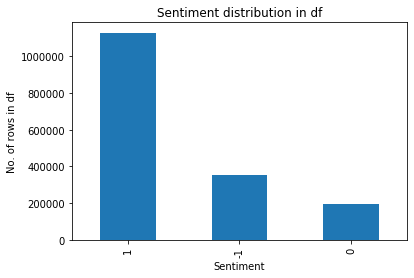

In [9]:
# Mapping stars to sentiment into three categories
df['sentiment'] = [ map_sentiment(x) for x in df['review_stars']]
# Plotting the sentiment distribution
plt.figure()
pd.value_counts(df['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

In [19]:
pd.value_counts(df['sentiment'])

 1    1128189
-1     353621
 0     192454
Name: sentiment, dtype: int64